<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/Assignment1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification** of the Instant Liking of a Deodrant based on the given 60 features. Some of them are:

1.) Personal Opinion of People

---


2.) Strength of Deodrant

---


3.) Bottles Owned by people

---


4.) Artificial Chemical used in the Deodrant.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [ ]:
#Reading the csv file
dataset=pd.read_csv("Data_train_reduced.csv")
print(dataset)

      Respondent.ID  ...  s13b.bottles.of.Deodorant.do.you.currently.own
0              3800  ...                                               3
1              3801  ...                                               4
2              3802  ...                                               2
3              3803  ...                                               3
4              3804  ...                                               3
...             ...  ...                                             ...
2495           5695  ...                                               3
2496           5696  ...                                               2
2497           5697  ...                                               5
2498           5698  ...                                               4
2499           5699  ...                                               1

[2500 rows x 64 columns]


In [ ]:
dataset.shape

(2500, 64)

In [ ]:
#Seeing the overall values of the features.
dataset.describe()

,Respondent.ID,Product.ID,Instant.Liking,q1_1.personal.opinion.of.this.Deodorant,q2_all.words,q3_1.strength.of.the.Deodorant,q4_1.artificial.chemical,q4_2.attractive,q4_3.bold,q4_4.boring,q4_5.casual,q4_6.cheap,q4_7.clean,q4_8.easy.to.wear,q4_9.elegant,q4_10.feminine,q4_11.for.someone.like.me,q4_12.heavy,q4_13.high.quality,q4_14.long.lasting,q4_15.masculine,q4_16.memorable,q4_17.natural,q4_18.old.fashioned,q4_19.ordinary,q4_20.overpowering,q4_21.sharp,q4_22.sophisticated,q4_23.upscale,q4_24.well.rounded,q5_1.Deodorant.is.addictive,q7,q8.1,q8.2,q8.5,q8.6,q8.7,q8.8,q8.9,q8.10,q8.11,q8.12,q8.13,q8.17,q8.18,q8.19,q8.20,q9.how.likely.would.you.be.to.purchase.this.Deodorant,q10.prefer.this.Deodorant.or.your.usual.Deodorant,q11.time.of.day.would.this.Deodorant.be.appropriate,q12.which.occasions.would.this.Deodorant.be.appropriate,Q13_Liking.after.30.minutes,q14.Deodorant.overall.on.a.scale.from.1.to.10,ValSegb,s7.involved.in.the.selection.of.the.cosmetic.products,s8.ethnic.background,s9.education,s10.income,s11.marital.status,s12.working.status,s13.2,s13a.b.most.often,s13b.bottles.of.Deodorant.do.you.currently.own
count,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,1500.000000,2500.000000,2500.000000,2000.000000,500.000000,500.00000,500.00000,2500.000000,2000.000000,2500.000000,500.000000,1000.00000,2500.000000,1500.000000,2500.000000,2500.000000,2500.000000,2500.0000,2500.000000,2500.000000,2500.000000,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,8249.500000,460.400000,0.24720,5.129600,1.121200,3.344400,2.500000,3.71680,3.546000,2.241600,3.487200,2.347600,3.788800,3.750800,3.628400,4.016400,3.558400,2.808800,3.682800,4.002800,2.078400,3.826400,3.467200,2.62880,2.860000,2.978800,3.332400,3.635200,3.527600,3.648000,3.336400,1.400000,0.047200,0.064000,0.053200,0.048800,0.041500,0.112000,0.07800,0.11400,0.020800,0.062500,0.038400,0.106000,0.06100,0.005200,0.052667,3.590000,2.826400,2.318000,2.1948,4.959600,6.746800,3.522400,4.0,1.665200,3.199200,4.996000,1.742000,1.898000,0.025296,0.038400,3.072000
std,3433.008516,308.412528,0.43147,1.481918,0.934055,0.743243,1.384618,1.27548,1.261951,1.242838,1.276906,1.312198,1.209289,1.305596,1.260376,1.200295,1.367969,1.474419,1.219992,1.102397,1.272203,1.163789,1.278428,1.40876,1.301491,1.426031,1.306673,1.270735,1.281365,1.197276,1.319064,1.264848,0.212109,0.244835,0.224477,0.215493,0.199493,0.315682,0.26844,0.31813,0.142743,0.242122,0.192198,0.308146,0.23945,0.071938,0.223442,1.396668,1.397514,0.804696,0.8492,1.769073,2.505274,1.964241,0.0,1.036889,0.970307,2.371125,0.726944,1.440426,0.104856,0.192198,1.620082
min,3800.000000,121.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,4.0,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,5324.750000,230.000000,0.00000,5.000000,0.000000,3.000000,1.000000,3.00000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,1.00000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,2.00

In [ ]:
#Getting separate values of features
personal_opinion = dataset.iloc[0:dataset.shape[0],4:5]
bottles = dataset.iloc[0:dataset.shape[0],-1]
strength = dataset.iloc[0:dataset.shape[0],6:7]
artificial_chemical = dataset.iloc[0:dataset.shape[0],7:8]
instant_liking=dataset.iloc[0:dataset.shape[0],3:4]

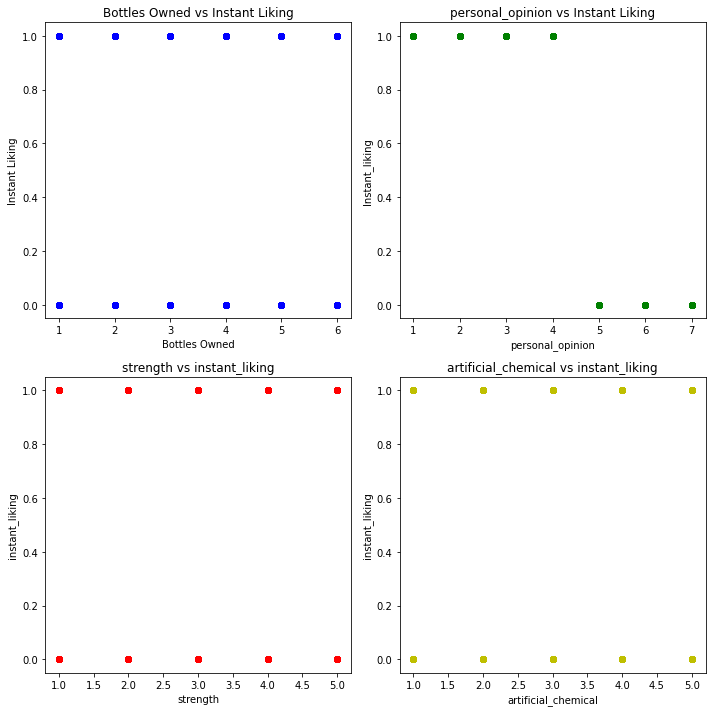

In [ ]:
#plotting graphs of features vs the classification value
fig,axes = plt.subplots(figsize=(10,10),nrows=2,ncols=2)

axes[0][0].scatter(bottles,instant_liking,color='b')
axes[0][0].set_xlabel("Bottles Owned")
axes[0][0].set_ylabel("Instant Liking")
axes[0][0].set_title("Bottles Owned vs Instant Liking")

axes[0][1].scatter(personal_opinion,instant_liking,color='g')
axes[0][1].set_xlabel("personal_opinion")
axes[0][1].set_ylabel("Instant_liking")
axes[0][1].set_title("personal_opinion vs Instant Liking")

axes[1][0].scatter(strength,instant_liking,color='r')
axes[1][0].set_xlabel("strength")
axes[1][0].set_ylabel("instant_liking")
axes[1][0].set_title("strength vs instant_liking")

axes[1][1].scatter(artificial_chemical,instant_liking,color='y')
axes[1][1].set_xlabel("artificial_chemical")
axes[1][1].set_ylabel("instant_liking")
axes[1][1].set_title("artificial_chemical vs instant_liking")

plt.tight_layout()


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
# replacing the nan values in the dataset with the mean of that column
dataset=dataset.fillna(dataset.mean())

In [ ]:
data=dataset.values       #dataframe to array
n=len(data[:,-1])
print(n)
#Creating the feature matrix
X=data[:,4:].reshape(n,60)
print(X[0])

2500
[4 1 4 2 5 4 2 3 5 5 5 4 5 3 1 5 1 2 4 5 4 5 1 1 4 1 4 1 1 0 0.0 0 0
 0.0415 1.0 0.078 0.114 0 0.0 0 0.106 0.061 0 0.0 2 1 1 2 1 7 7 4 1 4 3 1
 1 0.0 0 3]


In [ ]:
#creating the output variable matrix
Y=data[:,3].reshape(n,1)
Y

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=object)

In [ ]:
#Creating theta array
theta_array=np.zeros((61,1))
theta_array
theta_array.shape

(61, 1)

In [ ]:
#define hypothesis

def hypothesis(theta_array,X): #theta_array = [theta_array[0],theta_array[1]]
  hypo = theta_array[0]
  for i in range(1,61):
    hypo+=theta_array[i]*X[:,i]
  return hypo

In [ ]:
#Defining the cost function
def cost_function(theta_array,X,y,m):  #x and y are list of observations
  total_error = 0
  x=0
  for i in range(m):
    for j in range(60):
      x+=theta_array[j+1]*X[i][j]
    total_error+=(theta_array[0]+x-y[i])**2
    x=0
  return total_error/(2*m)

In [ ]:
#Defining thr gradient descent for the training
def gradient_descent(theta_array,X,y,alpha,m):
  summation_array=np.zeros((61,1))
  x=0

  for i in range(m):
    for j in range(60):
        x+=theta_array[j+1]*X[i][j]
    summation_array[0]=summation_array[0]+((theta_array[0]+x)-y[i])

  for k in range(60):
    for i in range(m):
      for j in range(60):
        x+=theta_array[j+1]*X[i][j]
      summation_array[k+1]=summation_array[k]+((theta_array[0]+x)-y[i])*X[i][k]

  new_theta_array=np.zeros((61,1))
  for i in range(61):
    new_theta_array[i] = theta_array[i] - alpha*(summation_array[i]/m)

  return new_theta_array

In [ ]:
#Defining the training process
def training(X,y,alpha,iters):
  theta_array=np.zeros((61,1))
  cost_function_values=[]

  m=X[:,0].size #size of dataset / number of observations

  for i in range(iters):
    theta_array=gradient_descent(theta_array,X,y,alpha,m)

    cost_function_values.append(cost_function(theta_array,X,y,m)) 
    """if i %10 ==0:
      y_new=theta_array[0] #linear regression line
      for j in range(60):
        y_new+=X[:,j]*theta_array[j+1]
      plt.plot(X[:,0],y_new,'r')
      plt.scatter(X[:,0],y)
      plt.show()"""

  x=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x,cost_function_values,"-b")
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost/loss Values")
  plt.title("Cost Function Curve")
  plt.show()
  return theta_array

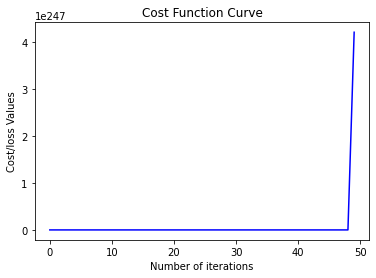

In [ ]:
theta_array=training(X,Y,0.001,50)

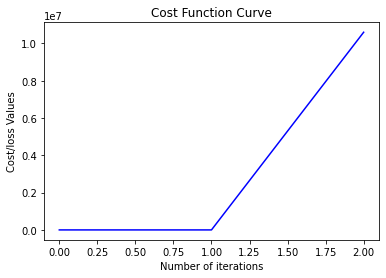

In [ ]:
theta_array1 = training(X,Y,0.001,3)

In [ ]:
def classifierPredict(theta,X):
  predictions = X.dot(theta)
  return predictions>0

In [ ]:
length=len(X[:,0])
print(theta_array1.shape)
X=np.append(np.ones((length,1)),X,axis=1)
print(X)
p=classifierPredict(theta_array1,X)
print("Train Accuracy: ",sum(p==Y)[0]/X.shape[0]*100,"%")

(61, 1)
[[1.0 4 1 ... 0.0 0 3]
 [1.0 5 1 ... 0.0 0 4]
 [1.0 6 1 ... 0.0 0 2]
 ...
 [1.0 4 2 ... 0.0 0 5]
 [1.0 5 2 ... 0.0 0 4]
 [1.0 7 3 ... 0.0 0 1]]
Train Accuracy:  24.72 %


***CONCLUSION:***

Here as we can see that the cost function is having increasing nature, which indicates that the method is not feasible/appropriate over the dataset.And that is also obvious because for fitting 60 parameters using a single linear line is not possible. In 1 instance the line is getting stretched by top levelled features while in other iteration by bottom leveled features. As we can see in the second training output the cost is increasing from 1st iteration only, we need to change the algorithm that is used for classification of the dataset. For dealing with large number of features (in this case 60) a complex regression line is required of higher degree.

Also as we can see the accuracy of the model is very low. This also indicates that the algorithm we are trying to use does not fit for the dataset.